<a href="https://colab.research.google.com/github/ravee2001/DataTypes/blob/main/CNN_for_person_classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [273]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random


In [274]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras import Sequential

In [275]:
from google.colab import drive #case mounted gdrive
drive.mount('/content/gdrive', force_remount=False)


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [277]:
import os  #case connect via OS
os.chdir("/content/gdrive/MyDrive/input")
os.getcwd()

'/content/gdrive/MyDrive/input'

In [278]:
path = "/content/gdrive/MyDrive/input"
files = os.listdir(path)
print(os.listdir(path))

['morganNEW', 'johnnyNEW', 'Morgan', 'Johnny', '.ipynb_checkpoints']


In [279]:
categories1= []
filename_johnny = os.listdir(path+"/Johnny")
for filename in filename_johnny:
        categories1.append(0)
df1 = pd.DataFrame({
    'filename': filename_johnny,
    'category': categories1
})
categories2= []
filename_morgan = os.listdir(path+"/Morgan")
for filename in filename_morgan:
        categories2.append(1)

df2 = pd.DataFrame({
    'filename': filename_morgan,
    'category': categories2
})


ทำให้ค่าเท่ากัน


In [280]:
from PIL import Image
def resize():
  for item in filename_johnny:
    if os.path.isfile(path+'/Johnny/'+item):
      im = Image.open(path+'/Johnny/'+item)
      f, e = os.path.splitext(path+'/Johnny/'+item)
      imResize = im.resize((200,200), Image.ANTIALIAS)
      if imResize != 'RGB':
          imResize = imResize.convert('RGB')
      imResize.save(path + '/johnnyNEW/'+ item ,'JPEG',qulity=90) #คุณภาพ90
      print(imResize.size)
resize()

<ipython-input-280-8fac932777fc>:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  imResize = im.resize((200,200), Image.ANTIALIAS)


(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)


In [281]:
def resize1():
  for item in filename_leonardo:
    if os.path.isfile(path+'/Morgan/'+item):
      im = Image.open(path+'/Morgan/'+item)
      f, e = os.path.splitext(path+'/Morgan/'+item)
      imResize = im.resize((200,200), Image.ANTIALIAS)
      if imResize != 'RGB':
          imResize = imResize.convert('RGB')
      imResize.save(path + '/morganNEW/'+ item ,'JPEG',qulity=90)
      print(imResize.size)
resize1()

<ipython-input-281-c2169c427471>:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  imResize = im.resize((200,200), Image.ANTIALIAS)


(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)
(200, 200)


In [282]:
df1.head(36) #ของJohnny

,filename,category
0,johnny deep0.jpg,0
1,johnny deep1.jpg,0
2,johnny deep2.jpg,0
3,johnny deep3.jpg,0
4,c6c82a034d0b5e6312fbda7776c8aef7.jpg,0
5,"flat,750x1000,075,f.jpg",0
6,johnny-depp-view-young-brown-eyed-wallpaper-pr...,0
7,desktop-wallpaper-fatima-on-johnny-depp-young-...,0
8,a7y0mBL_460s.jpg,0
9,young-johnny-depp-12.jpg,0


In [283]:
df2.head(12)  #ของMorgan

,filename,category
0,morgan-freeman-002.jpeg,1
1,47162_v9_bc.jpg,1
2,werfgfgd.jpg,1
3,"640px-Morgan_Freeman,_2006_(cropped).jpg",1
4,rtyfghfg.jpg,1
5,MV5BMTc0MDMyMzI2OF5BMl5BanBnXkFtZTcwMzM2OTk1MQ...,1
6,morgan-freeman-voice-over.jpg,1
7,Morgan-Freeman-Net-Worth.jpeg,1
8,1457047366-morgan-lead.jpg,1
9,intro-1651675012.jpg,1


In [284]:
df = df1.append(df2) #เอาอันที่1,2มารวมกัน

<ipython-input-284-f7f1eedb08a1>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2) #เอาอันที่1,2มารวมกัน


In [285]:
df.describe()

,category
count,48.000000
mean,0.250000
std,0.437595
min,0.000000
25%,0.000000
50%,0.000000
75%,0.250000
max,1.000000


In [286]:
df.tail(10)

,filename,category
2,werfgfgd.jpg,1
3,"640px-Morgan_Freeman,_2006_(cropped).jpg",1
4,rtyfghfg.jpg,1
5,MV5BMTc0MDMyMzI2OF5BMl5BanBnXkFtZTcwMzM2OTk1MQ...,1
6,morgan-freeman-voice-over.jpg,1
7,Morgan-Freeman-Net-Worth.jpeg,1
8,1457047366-morgan-lead.jpg,1
9,intro-1651675012.jpg,1
10,gettyimages-56349854-copy.jpg,1
11,images.jpg,1


In [287]:
df.head(10)

,filename,category
0,johnny deep0.jpg,0
1,johnny deep1.jpg,0
2,johnny deep2.jpg,0
3,johnny deep3.jpg,0
4,c6c82a034d0b5e6312fbda7776c8aef7.jpg,0
5,"flat,750x1000,075,f.jpg",0
6,johnny-depp-view-young-brown-eyed-wallpaper-pr...,0
7,desktop-wallpaper-fatima-on-johnny-depp-young-...,0
8,a7y0mBL_460s.jpg,0
9,young-johnny-depp-12.jpg,0


<Axes: >

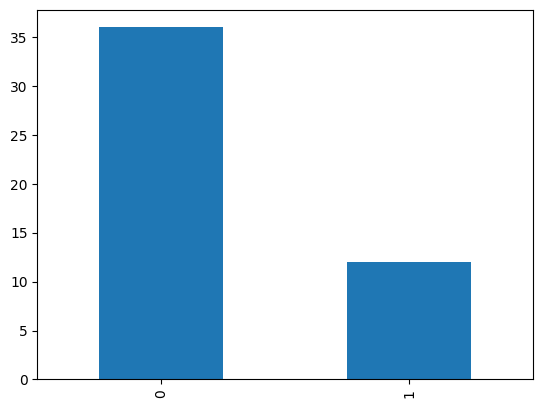

In [288]:
df['category'].value_counts().plot.bar()

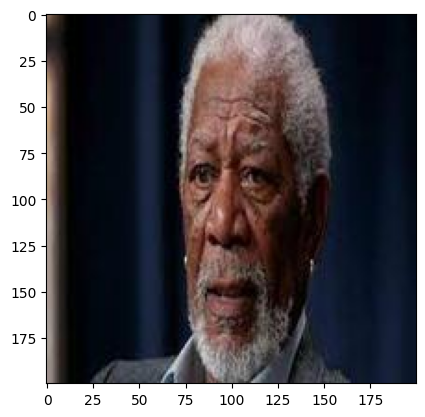

In [289]:
sample = random.choice(filename_morgan) #สุ่มภาพมา และใช้ฟังก์ชัน
image = load_img(path+"/morganNEW/"+sample)
plt.imshow(image) #นำภาพออกมา

เริ่ม

In [290]:
pip install keras

In [291]:
pip install tensorflow==2.12.0

In [292]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

In [293]:
X = np.empty([0]) #ค่าpixcelทั้งหมด
y = np.empty([0]) #คำเฉลย
filename_johnny = os.listdir(path+"/johnnyNEW")
filename_leonardo = os.listdir(path+"/morganNEW")
for filename in filename_johnny:
    print(path+"/johnnyNEW/"+filename)
    # load the image
    img = load_img(path+"/johnnyNEW/"+filename)

    #print(type(img))
    #print(img.format)
    #print(img.mode)
    print(img.size)
    img.show()


     # convert to numpy array
    img_array = img_to_array(img)

    X = np.append (X,img_array)
    category = filename.split('.')[0]
    y = np.append(y,[0]) #ค่าของjohn

for filename in filename_morgan:
    print(path+"/morganNEW/"+filename)
    # load the image
    img = load_img(path+"/morganNEW/"+filename)

    #print(type(img))
    #print(img.format)
    #print(img.mode)
    print(img.size)
    img.show()


     # convert to numpy array
    img_array = img_to_array(img)

    X = np.append (X,img_array)
    category = filename.split('.')[0]
    y = np.append(y,[1]) #ค่าของmorgan


/content/gdrive/MyDrive/input/johnnyNEW/johnny deep0.jpg
(200, 200)
/content/gdrive/MyDrive/input/johnnyNEW/johnny deep3.jpg
(200, 200)
/content/gdrive/MyDrive/input/johnnyNEW/johnny deep1.jpg
(200, 200)
/content/gdrive/MyDrive/input/johnnyNEW/johnny deep2.jpg
(200, 200)
/content/gdrive/MyDrive/input/johnnyNEW/c6c82a034d0b5e6312fbda7776c8aef7.jpg
(200, 200)
/content/gdrive/MyDrive/input/johnnyNEW/flat,750x1000,075,f.jpg
(200, 200)
/content/gdrive/MyDrive/input/johnnyNEW/johnny-depp-view-young-brown-eyed-wallpaper-preview.jpg
(200, 200)
/content/gdrive/MyDrive/input/johnnyNEW/desktop-wallpaper-fatima-on-johnny-depp-young-johnny-depp-johnny-depp-johnny-depp-cry-baby.jpg
(200, 200)
/content/gdrive/MyDrive/input/johnnyNEW/a7y0mBL_460s.jpg
(200, 200)
/content/gdrive/MyDrive/input/johnnyNEW/young-johnny-depp-12.jpg
(200, 200)
/content/gdrive/MyDrive/input/johnnyNEW/sweet-young-Johnny-johnny-depp-35702192-674-1000.jpg
(200, 200)
/content/gdrive/MyDrive/input/johnnyNEW/desktop-wallpaper-johnny

In [294]:
X = X.reshape(len(y),200,200,3) #X ตอนนี้มีภาพทั้งหมดแล้ว 200คูณ200 3layer
x_vector = 200*200*3

In [295]:
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))

(48, 200, 200, 3)
(48,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [296]:
print(y) #0คือjohnny 1คือmorgan

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [297]:
X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=1000)
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

print(type(X_train))
print(type(y_train))

len_train  = len(X_train)
len_test = len(X_test)

X_train shape (38, 200, 200, 3)
y_train shape (38,)
X_test shape (10, 200, 200, 3)
y_test shape (10,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [298]:

X_train /= 255
X_test /= 255

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (38, 200, 200, 3)
y_train shape (38,)
X_test shape (10, 200, 200, 3)
y_test shape (10,)


In [299]:
X_train[1] #200box 3ช่อง

array([[[0.14117647, 0.09411765, 0.09411765],
        [0.14509804, 0.09803922, 0.09803922],
        [0.14117647, 0.09411765, 0.09411765],
        ...,
        [0.04313725, 0.04313725, 0.04313725],
        [0.04313725, 0.04313725, 0.04313725],
        [0.04705882, 0.04705882, 0.04705882]],

       [[0.10980392, 0.0627451 , 0.0627451 ],
        [0.11372549, 0.06666667, 0.06666667],
        [0.11764706, 0.07058824, 0.07058824],
        ...,
        [0.06666667, 0.06666667, 0.06666667],
        [0.05882353, 0.05882353, 0.05882353],
        [0.05098039, 0.05098039, 0.05098039]],

       [[0.12156863, 0.0745098 , 0.0745098 ],
        [0.12941176, 0.08235294, 0.08235294],
        [0.1372549 , 0.09019608, 0.09019608],
        ...,
        [0.03529412, 0.03529412, 0.03529412],
        [0.03137255, 0.03137255, 0.03137255],
        [0.02745098, 0.02745098, 0.02745098]],

       ...,

       [[0.72941176, 0.66666667, 0.70980392],
        [0.72941176, 0.66666667, 0.70980392],
        [0.71764706, 0

In [300]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D

Three Block Model

In [301]:

# Build the CNN model

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(200,200, 3)),
    MaxPooling2D(2, 2),#ชั้น1
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),#ชั้น2
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),#ชั้น3
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Add dropout for regularization
    Dense(1, activation='sigmoid')
])


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 23, 23, 128)       0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 67712)            

In [302]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras import Sequential

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10,validation_data = (X_test,y_test),callbacks =None)

Epoch 1/10
2/2 [==============================] - 3s 639ms/step - loss: 1.0272 - accuracy: 0.4737 - val_loss: 1.0534 - val_accuracy: 0.8000
Epoch 2/10
2/2 [==============================] - 2s 515ms/step - loss: 1.3734 - accuracy: 0.7368 - val_loss: 0.7863 - val_accuracy: 0.2000
Epoch 3/10
2/2 [==============================] - 2s 543ms/step - loss: 0.7031 - accuracy: 0.5263 - val_loss: 0.5764 - val_accuracy: 0.8000
Epoch 4/10
2/2 [==============================] - 2s 509ms/step - loss: 0.5860 - accuracy: 0.7368 - val_loss: 0.6589 - val_accuracy: 0.8000
Epoch 5/10
2/2 [==============================] - 3s 850ms/step - loss: 0.7136 - accuracy: 0.7368 - val_loss: 0.5037 - val_accuracy: 0.8000
Epoch 6/10
2/2 [==============================] - 4s 870ms/step - loss: 0.5342 - accuracy: 0.7368 - val_loss: 0.5113 - val_accuracy: 0.8000
Epoch 7/10
2/2 [==============================] - 2s 508ms/step - loss: 0.4702 - accuracy: 0.7632 - val_loss: 0.4509 - val_accuracy: 0.8000
Epoch 8/10
2/2 [====

In [304]:
class_names = ['Johnny', 'Morgan']

In [305]:
from sklearn.metrics import classification_report # tested with 0.21.2l
# Get Model Predictions for test data
prediction = model.predict(X_test)
# Predict the class based on the probability
predicted_class = (prediction> 0.5).astype("int32")
print(classification_report(y_test, predicted_class, target_names=class_names))

              precision    recall  f1-score   support

      Johnny       0.67      0.25      0.36         8
      Morgan       0.14      0.50      0.22         2

    accuracy                           0.30        10
   macro avg       0.40      0.38      0.29        10
weighted avg       0.56      0.30      0.34        10



In [306]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predicted_class)

array([[2, 6],
       [1, 1]])

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


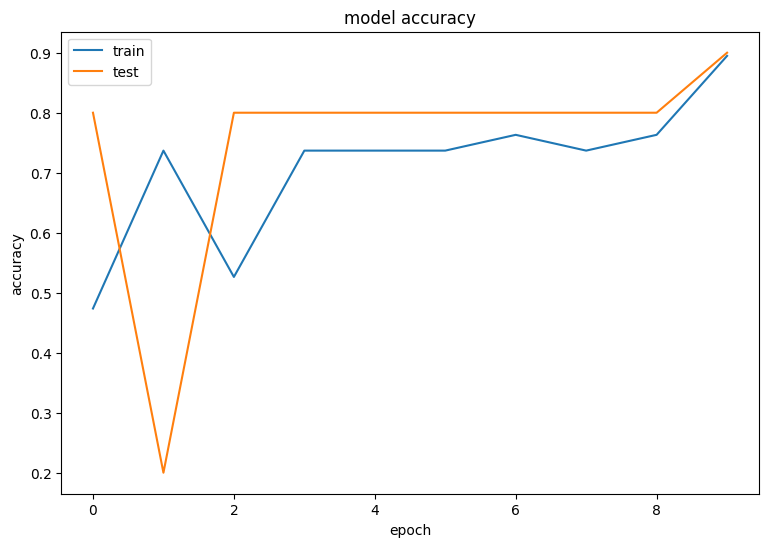

In [307]:
print(history.history.keys())
plt.figure(figsize=(9,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

In [308]:
test_loss, test_accuracy = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_accuracy)

1/1 - 0s - loss: 0.7044 - accuracy: 0.3000

Test accuracy: 0.30000001192092896


Visualize model

In [309]:
pip install visualkeras

In [310]:
import visualkeras

In [311]:
tf.keras.Sequential([model,tf.keras.layers.Softmax()])
result = model.predict(X_test)
for i in range(10):
  print(np.argmax(result[i]))

0
0
0
0
0
0
0
0
0
0


In [312]:
print(np.argmax(result[3])) #john = 0 , mor = 1
resultx = np.argmax(result[3])
if resultx == 0:
  print("Johnny")
else:
  print("Morgan")

0
Johnny


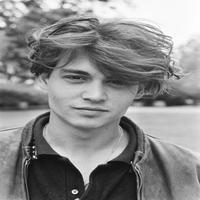

In [313]:
from tensorflow.keras.utils import array_to_img
image_show = array_to_img(X_test[3].reshape(200,200,3))
image_show

[[0.5112406]]
Morgan


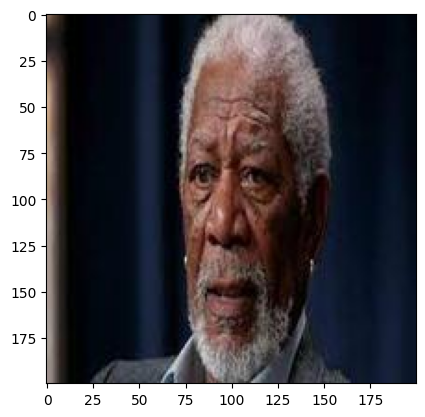

In [321]:
# load and prepare the image
def load_image(filename):
 # load the image
 img = load_img(filename, target_size=(200, 200))#แปลงขนาด
 # convert to array
 img = img_to_array(img) #เป็นarray
 # reshape into a single sample with 3 channels
 img = img.reshape(1, 200, 200, 3)
 # center pixel data
 img = img.astype('float32')
 img /= 255
 #img = img - [123.68, 116.779, 103.939]
 return img

# load an image and predict the class
def run_example():
 # load the image
 img = load_image('/content/morwerwe.jpg')
 # predict the class
 result = model.predict(img) #เก็บตัวแปรลงในresult
 print(result)

 result_class = (result> 0.5).astype("int32")

 if result_class  == 0:
    print("Johnny")


 else:
    print("Morgan")


# entry point, run the example

run_example()
plt.imshow(image)